### HISTOGRAMS
Statistics is often thought of as a way to find certainty through data. The strength of statistics is more often used to communicate that certainty does not really exist. It provides tools to communicate how uncertain we are about a problem. There is no better tool to visualize the uncertainty and chaos than a histogram. A histogram displays the distribution of your underlying data.

Histograms reveal through numbers, interpretable trends in your data. They don't provide a `yes` or `no` answer, but are often used as a starting point for discussion and informing an answer to your data.


#### Summarizing your data
The purpose of a histogram is to summarize data that you can use to inform a decision or explain a distribution.While a histogram is one of the most useful tools for communicating trends, people often use the average of a dataset to make broad claims about its underlying trends.While the average value of data may be useful to interpret where the data is centered, it can also be misleading.

In [1]:
# Import packages
import numpy as np
import pandas as pd

In [2]:
# Read in transactions data
transactions = pd.read_csv('../Datasets/transactions.csv')
transactions = transactions.drop(["Unnamed: 0"], axis = 1)

In [3]:
# Save transaction times to a separate numpy array
times = transactions["Transaction Time"].values
cost = transactions["Cost"].values

In [4]:
# Print transactions below
print(transactions)

# Print the average times below
print('Average time for a transaction is {}'.format(np.average(times)))

     Transaction Time        Cost
0            7.939419   98.422021
1            4.314811   87.329861
2            6.394080  112.334882
3            7.031504   87.570689
4            5.840730   97.321191
..                ...         ...
995         18.728278   34.802198
996         18.183858   36.349422
997         16.803236   59.230032
998         19.680992   23.748946
999         23.369355   57.442948

[1000 rows x 2 columns]
Average time for a transaction is 14.943439668312365


The Transaction Time column contains numbers between 0 and <24. The number 0 is 12:00am. You can think of <24 as just before midnight the next day, or 11:59pm.

#### Range
Histograms are helpful for understanding how your data is distributed. While the average time  a customer may arrive at the grocery store is 3 pm, the manager knows 3 pm is not their busiest times of the day. It's important to understand the extremes of your data: the minimum and maximum values in your dataset. With the minimum and maximum, you can calculate the range. The range of your data is the difference between the maximum and minimum values in your dataset.

In [5]:
# Find the minimum time, maximum time, and range
min_time = np.amin(times) 
max_time = np.amax(times) 
range_time = max_time - min_time 

In [6]:
# Printing the values
print("Earliest Time: " + str(min_time))
print("Latest Time: " + str(max_time))
print("Time Range: " + str(range_time))

Earliest Time: 0.02661518360957871
Latest Time: 23.675374635328755
Time Range: 23.648759451719176


#### Bins and Count 
In the previous cells, we found that the earliest transaction time is close to 0, and the latest transaction is close to 24, making your range nearly 24 hours.

Now, we have the information we need to start building our histogram. The two key features of a histogram are bins and counts.

#### Bins
A bin is a sub-range of values that falls within the range of a dataset. In the grocery store example, a valid bin may be from 0 hours to 6 hours. This bin includes all times from just after midnight (0) until 6 am (6).

Additionally, all bins in a histogram must be the same width.

If the range of values in our dataset is from 0 to 24, and the first bin in our grocery store example is from 0 to 6, can we figure out the minimums and maximums of the other bins?

The grocery store bins are:

- 0 to 6 hours
- 6 to 12 hours
- 12 to 18 hours
- 18 to 24 hours

In [7]:
# Array of days old bread
days_old_bread = np.array([0, 8, 7, 8, 0, 2, 3, 5, 6, 2])

# Set the minimum and maximums of the array below
min_days_old = np.amin(days_old_bread)
max_days_old = np.amax(days_old_bread)


# Set the number of bins to 3
bins = 3

# Calculate the bin range
try:
    bin_range = (max_days_old - min_days_old + 1) / bins
    print("Bins: " + str(bins))
    print("Bin Width: " + str(bin_range))
# Printing the values
except:
    print("You have not set the min, max, or bins values yet.")

Bins: 3
Bin Width: 3.0


A count is the number of values that fall within a bin’s range. For example, if 100 customers arrive at your grocery store between midnight (0) and 6 am (6), your count for that bin is equal to 100.

`exercise_ages = np.array([20, 27, 45, 69, 34, 52, 42, 22, 34, 26])`

Question: What is our range?

- Answer: Between 20 and 69

Question: How many bins do we need?

- Answer: The bins are 20s, 30s, 40s, 50s, and 60s, so we need five bins, each covering ten years.




The store manager checks the age of all loaves on the shelves every three days, with the freshest loaves displayed on the most obvious shelf, and the oldest loaves being thrown out.

Because of this pattern, the store manager wants to know the number of loaves in each of three different bins.

Count the number of loaves that have values of 0, 1, or 2, and save it to `days_old_012`

In [8]:
# Count the values in each bin 
days_old_012 = 4
days_old_345 = 2
days_old_678 = 4

# Printing the values
print("Between 0 and 2 days: " + str(days_old_012))
print("Between 3 and 5 days: " + str(days_old_345))
print("Between 6 and 8 days: " + str(days_old_678))

Between 0 and 2 days: 4
Between 3 and 5 days: 2
Between 6 and 8 days: 4


#### Histograms
While counting the number of values in a bin is straightforward, it is also time-consuming. How long do you think it would take you to count the number of values in each bin for:

 - an exercise class of 50 people?
 - a grocery store with 300 loaves of bread?
Most of the data you will analyze with histograms includes far more than ten values.

For these situations, we can use the `numpy.histogram()` function. In the example below, we use this function to find the counts for a twenty-person exercise class.

`exercise_ages = np.array([22, 27, 45, 62, 34, 52, 42, 22, 34, 26, 24, 65, 34, 25, 45, 23, 45, 33, 52, 55])`
`np.histogram(exercise_ages, range = (20, 70), bins = 5)`

 - exercise_ages is the input array
 - range = (20, 70) — is the range of values we expect in our array. Range includes everything from 20, up until but      not including 70.
 - bins = 5 is the number of bins. Python will automatically calculate equally-sized bins based on the range and          number of bins.
 
Below, you can see the output of the numpy.histogram() function:
`(array([7, 4, 4, 3, 2]), array([20., 30., 40., 50., 60., 70.]))`
The first array, array([7, 4, 4, 3, 2]), is the counts for each bin. The second array, array([20., 30., 40., 50., 60., 70.]), includes the minimum and maximum values for each bin:

 - Bin 1: 20 to <30
 - Bin 2: 30 to <40
 - Bin 3: 40 to <50
 - Bin 4: 50 to <60
 - Bin 5: 60 to <70


In [9]:
# Use numpy.histogram() below
times_hist = np.histogram(times, range = (0, 24), bins = 4)

print(times_hist)

(array([101, 231, 213, 455]), array([ 0.,  6., 12., 18., 24.]))


It should be seen that the store is the busiest between the hours of 18 and 24. This is between 6pm and midnight.

#### Plotting a Histogram

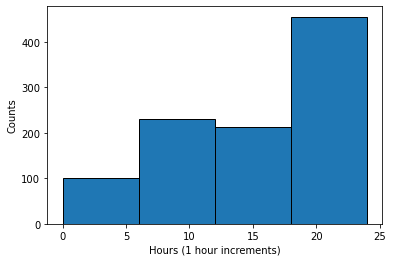

In [10]:
from matplotlib import pyplot as plt

# Use plt.hist() below
plt.hist(times, range = (0, 24), bins = 4, edgecolor = 'black')
plt.xlabel('Hours (1 hour increments)')
plt.ylabel('Counts')
plt.show()

#### Finding your Best Bin Size
This histogram is helpful for our store manager. The last six hours of the day are the busiest — from 6 pm until midnight. Does this mean the manager should staff their grocery store with the most employees between 6 pm and midnight?

To the manager, this doesn’t make much sense. The manager knows the store is busy when many people get off work, but the rush certainly doesn’t continue later than 9 pm.

The issue with this histogram is that we have too few bins. When plotting a histogram, it’s essential to select bins that fully capture the trends in the underlying data. Often, this will require some guessing and checking. There isn’t much of a science to selecting bin size.

How many bins do you think makes sense for this example? I would try 24 because there are 24 hours in a day.



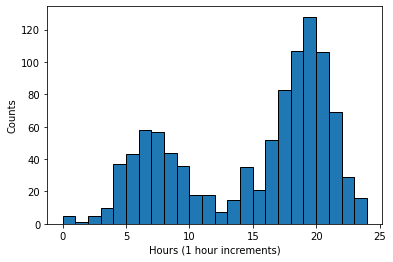

In [11]:
# Use plt.hist() below
plt.hist(times, range = (0, 24), bins = 24, edgecolor = 'black')
plt.xlabel('Hours (1 hour increments)')
plt.ylabel('Counts')
plt.show()

Now, the store manager wants a histogram of transaction costs. Try plotting a histogram for the cost variable.

In [12]:
bins = int(np.sqrt(len(cost)))
min_cost = np.amin(cost)
max_cost = np.amax(cost)
print('Min cost is {} and max cost is {}'.format(min_cost, max_cost))

Min cost is 0.006311511239784906 and max cost is 161.40774660806855


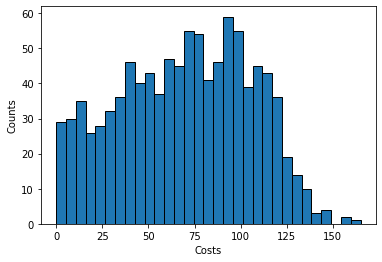

In [13]:
# Use plt.hist() below
plt.hist(cost, range = (0, 165), bins = bins, edgecolor = 'black')
plt.xlabel('Costs')
plt.ylabel('Counts')
plt.show()

#### Mini Project

Traveling to Acadia
Imagine you work at a travel agency and want to inform your customers of the best time to visit one of your favorite vacation locations, Acadia, Maine. In this project, you will use flower bloom data, and flight information to recommend the best time of year for someone to make a trip to Maine.


`in_bloom` is a NumPy array containing 900 numbers. Each number is a day of the year, which represents the average start date of a flower blooming.
`flights` is a NumPy array with 11,000 numbers. Each number is a day of the year, which represents a flight from your hometown to airports near Acadia, Maine.
Your goal is to create two histograms, each displaying the frequency of an occurrence each day of the year (either flights or flower blooms).

You will use the `in_bloom` variable to find a count of the number of flowers that start blooming each day of the year.

You will use the flights `variable` to find a count of the number of flights that occur each day of the year.

In [14]:
# load in data
in_bloom = np.loadtxt(open("../Datasets/in-bloom.csv"), delimiter=",")
flights = np.loadtxt(open("../Datasets/flights.csv"), delimiter=",")

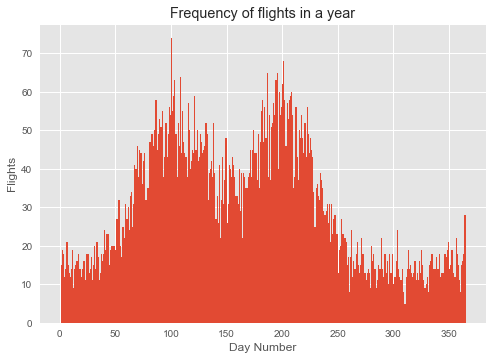

In [18]:
# Plot the histograms
plt.style.use('seaborn-not')
plt.hist(flights, range = (0, 365), bins = 365)
plt.title('Frequency of flights in a year')
plt.xlabel('Day Number')
plt.ylabel('Flights')
plt.show()